In [1]:
import neuroni_funzioni as nfz
import numpy as np 


In [43]:
import numpy as np
class AdalineSGD(object):
    def __init__(self , eta=0.01 , n_iter = 10 , shuffle = True , random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False 
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self , X , y):
        self._initialize_weights (X.shape[1]) #shape dà numero di righe o colonne
        self.cost_=[]
        for i in range(self.n_iter):
            if self._shuffle: 
                X,y = self._shuffle(X,y)
            cost = []
            for xi , target in zip(X,y):
                cost.append(self._update_weights(xi , target))
                avg_cost=sum(cost)/len(y)
                self.cost_.append(avg_cost)
        return self
    
    def _shuffle(self , X , y): #Funzione che fa lo shuffle
        r=self.rgen.permutation(len(y))
        return X[r] , y[r]
    
    def _update_weights(self , xi , target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:]+=self.eta*xi.dot(error)
        self.w_[0]+= self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def partial_fit(self , X , y): #serve per il caso nel quale ho i pesi inizializzati
        if not self.w_initialized : 
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0]>1:
            for xi , target in zip(X , y):
                self._update_weights(xi, targer)
        else: #Mi serve per non far avere errore a zip se ho 1 solo valore
            self._update_weights(X,y)
        return self
    
    def _initialize_weights(self , m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_=self.rgen.normal(loc = 0.0 , scale = 0.01 , size=1+m)
        self.w_initialized = True
    
    def net_input(self , X):
        return np.dot(X , self.w_[1:])+self.w_[0]
    
    def activation(self , X):
        return X
    
    def predict(self , X):
        return np.where(self.activation(self.net_input(X))>= 0.0 , 1 , -1)

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None) 
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
import numpy as np
import matplotlib.pyplot as plt
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa',-1,1) 
X = df.iloc[0:100,[0,1,2,3]].values 

In [46]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y, classifier , resolution = 0.02):
    #stup dei marker e dei colori
    markers = ('s','x','o','^','v')
    colors = ('red' , 'blue' , 'lightgreen' , 'gray' , 'cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])
    #plot
    x1_min , x1_max = X[:,0].min()-1 , X[:, 0].max()+1
    x2_min , x2_max = X[:,1].min()-1 , X[:, 1].max()+1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution) , np.arange(x2_min , x2_max , resolution))
    Z = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1 , xx2 , Z , alpha=0.3 , cmap=cmap)
    plt.xlim(xx1.min() , xx1.max())
    plt.ylim(xx2.min() , xx2.max())
    
    #plot esempio. Qui posso plottare i punti di test, così vediamo se è tutto ok.
    for idx, cl , in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl , 0],y=X[y==cl , 1], alpha=0.8 , c=colors[idx], marker=markers[idx], label=cl , edgecolor='black')

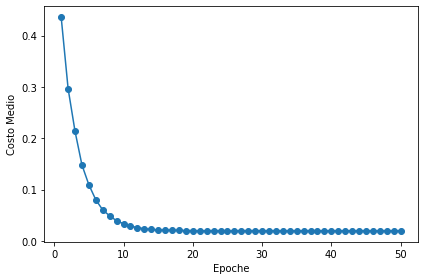

In [5]:
ada_sgd=nfz.AdalineSGD(n_iter=50 , eta = 0.001 , random_state=1)
ada_sgd.fit(X , y)

plt.plot(range(1,len(ada_sgd.cost_)+1) , ada_sgd.cost_ , marker='o')
plt.xlabel('Epoche')
plt.ylabel('Costo Medio')
plt.tight_layout()
plt.show()
